# Random Diagonal Clifford (simulator)

In [1]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram

In [2]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [3]:
import sys
sys.path.append("../")

In [4]:
import random
import numpy as np
import importlib
import pickle
import time
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
from test_unitaries import *

In [6]:
np.random.seed(seed=42)
seed = 42 # random seed
num_data = 200 # original: 10000
Nq = 4 # number of qubit
Ns = 1000

In [7]:
results = []

In [8]:
def decide_lrc_depth(t, eps, n):
    D = np.ceil(t ** 9 * (n * t + np.log2(1 / eps)))
    return int(D)

In [9]:
def decide_rdc_depth(t, eps, n):
    D = np.ceil(2 * t - np.log2(eps) / n)
    return int(D)

In [10]:
for i in range(1, num_data + 1):
    t1 = time.time()
    qc = QuantumCircuit(Nq, Nq)
    D = 8
    qc.append(RDC(Nq, D, to_gate=True, seed = i - 1), range(Nq))
    qc.measure(range(Nq), range(Nq)[::-1])
    results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_transpiler=seed, seed_simulator=seed).result())
    t2 = time.time()
    if i % 100 == 0:
        print("added", i, "th data (", t2 - t1, "s)")
        with open("test_data_rdc_depth8_simulator.pkl", "wb") as f:
            pickle.dump(results, f)

added 100 th data ( 0.4436030387878418 s)
added 200 th data ( 0.497730016708374 s)


In [11]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

In [12]:
counts = results_to_counts(results)

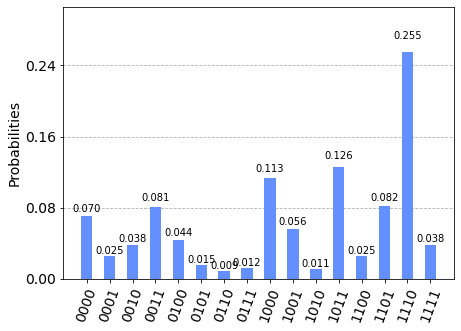

In [13]:
plot_histogram(counts[0])

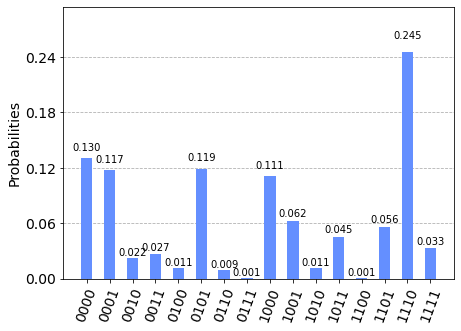

In [14]:
plot_histogram(counts[1])

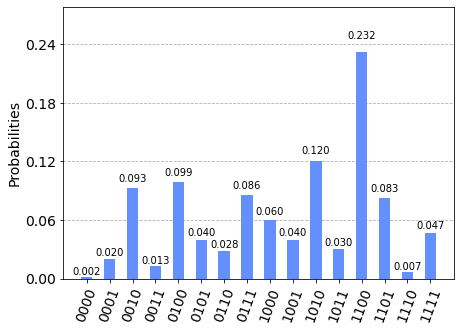

In [15]:
plot_histogram(counts[2])

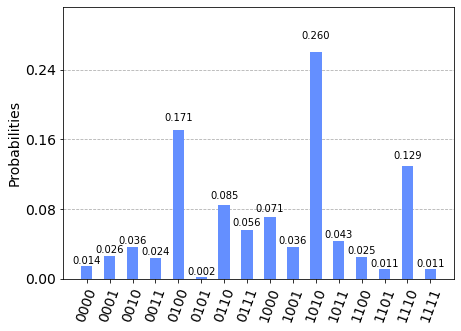

In [16]:
plot_histogram(counts[3])

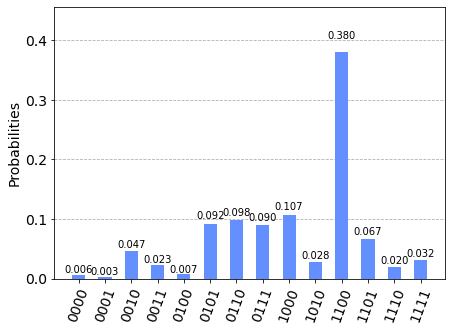

In [17]:
plot_histogram(counts[4])

In [18]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [19]:
ibmq_montreal = provider.get_backend("ibmq_montreal")

In [20]:
from qiskit.compiler import transpile
qc = QuantumCircuit(Nq, Nq)
D = 8
qc.append(RDC(Nq, D, to_gate=True, seed = 0), range(Nq))
tqc = transpile(qc, backend = ibmq_montreal, approximation_degree=0)
tqc.count_ops(), tqc.depth()

(OrderedDict([('cx', 329), ('rz', 176), ('sx', 32)]), 370)